# Fine-tuning your model

Having trained your model, your next task is to evaluate its performance. What metrics can you use to gauge how good your model is? So far, you have used accuracy for classification and R-squared for regression. In this chapter, you will learn about some of the other metrics available in scikit-learn that will allow you to assess your model's performance in a more nuanced manner. You will then learn to optimize both your classification as well as regression models using hyperparameter tuning.

## Classification metrics
* Measuring model performance with accuracy:
- Fraction of correctly classified samples
- Not always a useful metric

### Class imbalance example: Emails
Consider a spam classification problem in which 99% of emails are real and only 1% are spam.
I could build a model that classified all email as real: this model would be correct 99% of the time and thus have an accuracy of 99%, which sounds great. However, this naive classifier does a horrible job of predicting spam: it never predicts spam at all, so it completely fails at its original purpose.
The situation when one class is more frequent os call **class imbalance**, because the class of real email contains way more instances than the class of spam.
This is a very common situation in practice and requires a more nuanced metric to assess the performance of our model.

### Diagnosing classification predictions

Given a binary classifier, we can draw up a 2-by-2 matrix that summarizes predictive performance called a **confusion matrix**.

Across the top are the predicted labels, down the side actual labels.

<img src="confusion-matrix.png" alt="Drawing" style="width: 400px;"/>

Given any model, we can fill in the confusion matrix according to its predictions.

### Why do we care about the confusion matrix?

First, notice that you can retrieve accuracy from the confusion matrix: it's the sum of the diagonal divided by the total sum of the matrix.

There are several other important metrics you can easily calculate from the confusion matrix.
* Precision: true positives / ( true positives + false positives ) . It is called the positive predictive value or PPV.
* Recall: true positives / ( true positives + false negatives ) . This is called sensitivity, hit rate, or true positive rate.
* F1 Score: 2 * (precision * recall) / (precision + recall). In other words, it's the harmonic mean of precision and recall.

High precision: low false positive rate, that is, not many real emails were predicted as being spam.

High recall means that our classifier predicted most positive or spam emails correctly

In [1]:
# Importing packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Exercise - Metrics for classification

Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [2]:
# Loading the dataset into a DataFrame df and the feature and target variable arrays X and y 
df = pd.read_csv('dados/diabetes.csv')
X = df.drop('diabetes', axis = 1)
y = df.diabetes

In [3]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## Logistic regression and the ROC curve

Despite its name, logistic regression is used in classification problems, not regression problems.

Logistic regression for binary classification
* Given one feature, log reg will output a probability, p, with respect to the target variable.

Probability thresholds
* By default, logistic regression threshold = 0.5
* Not specific to logistic regression
- k-NN classifiers also have thresholds

### The ROC curve

What happens if we vary the threshold?
In particular, what happens to the true positive and false positive rates as we vary the threshold?

When the threshold equals zero, the models predicts '1' for all the data, which means the true positive is equal to the false positive rate is equal to one.

When the threshold equals '1', the model predicts '0' for all the data, which means that both true and false positive rates are 0.

If we vary the threshold between these two extremes, we get a series of different false positive and true positive rates.

The set of point we get when trying all possible thresholds is called the Receiver Operating Characteristic curve or ROC curve.

<img src="roc-curve.png" alt="Drawing" style="width: 400px;"/>

In [4]:
# Exercise - Building a logistic regression model

# Import the necessary modules
from sklearn.linear_model import LogisticRegression 
# from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



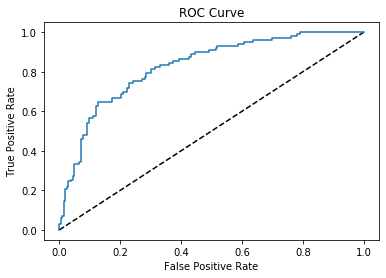

In [5]:
# Plotting an ROC curve

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Precision-recall Curve

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

<img src="precision-recall-curve.png" alt="Drawing" style="width: 200px;"/>

### Area under the ROC curve (AUC)

The question is: given the ROC curve, can we extract a metric of interest?

The larger the area under the ROC curve, the better our model is!

The way to think about this is the following: if we had a model which produced an ROC curve that had a single point at 1,0, the upper left corner, representing a true positive rate of one a a false positive rate of zero, this would be a great model!
For this reason, the area under the ROC, commonly denoted as AUC, is another popular metric for classification models.

<img src="roc-auc.png" alt="Drawing" style="width: 200px;"/>

In [6]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8268608414239482
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


## Hyperparameter tuning
* Linear regression: Choosing parameters for the model that fit the data the best
* Ridge/lasso regression: choosing alpha before fitting it
* k-Nearest Neighbors: Choosing n_neighbors before fitting and predicting
* Parameters like alpha and k, ones that need to be specified before fitting a model, are called Hyperparameters.

These are parameters that cannot be explicitly learned by fitting the model.

### Choosing the correct hyperparameter
* Try a bunch of different hyperparameter values
* Fit all of them separately
* See how well each performs
* Choose the best performing one

This is called **hyperparameter tunning** and doing so in this fashion is the current standard.

It is essential to use cross-validation, because as using train teste split alone would risk overfitting the hyperparameter to the test set.

### Grid search cross-validation

We choose a grid of possible values we want to try for the hyperparameter(s).

For example, if we had two hyperparameters, C and alpha, the grid values to test could like the figure above. We then perform k-fold cross-validation for each point in the grid, that is, for each choice of hyperparameter or combination of hyperparameters. We then choose for our model the choose of hyperparamters that performed the best!

<img src="grid-search.png" alt="Drawing" style="width: 300px;"/>

### *C* regularization parameter in logistic regression 

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

#### Exercise - Hyperparameter tuning with GridSearchCV

Your job is to use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space.

In [7]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708853238265002


### Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

### Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

#### Exercise
As before, the feature array X and target variable array y of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use RandomizedSearchCV to find the optimal hyperparameters. Go for it!

In [8]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 3}
Best score is 0.7409982174688057


### Hold-out set for final evaluation

Hold-out set reasoning:
* How well can the model perform on never before seen data? SO, I want to use my model to predict on some labeled data, compare my prediction to the actual labels, and compute the scoring function.

* Using ALL data for cross-validation is not ideal

* Split data into training and hold-out set at the beginning

* Perform grid search cross-validation on training set

* Choose best hyperparamenters and evaluate on hold-out set

#### Exercise

In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [9]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7608695652173914


### Elastic net regularization

Remember lasso and ridge regression from the previous chapter? Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

a∗L1+b∗L2

In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

#### Exercise
In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [10]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/home/wesley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.733018591571305, tolerance: 0.008436684782608696
  positive)
/home/wesley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.92005013705252, tolerance: 0.008285869565217392
  positive)
/home/wesley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.69617864870427, tolerance: 0.00867391304347826
  positive)
/home/wesley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to inc

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.24765337510702715
Tuned ElasticNet MSE: 0.16664179543611007


/home/wesley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.87629751791526, tolerance: 0.010609565217391308
  positive)
